In [29]:
import numpy as np

def draw_axis(ax, location, orientation, darkness, axis_limits):
    # Axis Colors
    f = 1 + darkness  # Darkness should be from 0 to 1
    color = np.array([
    np.array([182, 2, 8]) / 182 / f,
    np.array([59, 114, 29]) / 114 / f,
    np.array([4, 110, 143]) / 143 / f
    ])

    # Plotting 3 vectors
    isometric = [-45, 35.264]
    for i in range(3):
        vec = orientation[:, i]
        ax.quiver(location[0], location[1], location[2], vec[0], vec[1], vec[2], linewidth=2, color=color[i, :])
        axis_limits = check_axis_limits(vec, axis_limits)

    # Viewing and Plot Settings
    ax.view_init(*isometric)
    ax.grid(True, linestyle='-', linewidth=0.25)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')



    return axis_limits

def draw_axis2(ax, T, darkness, axis_limits=None):
    if axis_limits is None:
        axis_limits = initialize_axis_limits()

    axis_colors = [(1 - darkness, 0, 0), (0, 1 - darkness, 0), (0, 0, 1 - darkness)]

    for i, color in enumerate(axis_colors):
        start = T[:-1, -1]
        end = T[:-1, -1] + T[:-1, i]
        ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color=color, linewidth=2)

        # Update axis_limits
        for coord in [start, end]:
            axis_limits = check_axis_limits(coord, axis_limits)

    return axis_limits



def initialize_axis_limits():
    return {'xmin': -0.01, 'xmax': 0.1, 'ymin': -0.01, 'ymax': 0.1, 'zmin': -0.01, 'zmax': 0.1}

def check_axis_limits(p_now, axis_limits):
    x, y, z = p_now
    if x > axis_limits['xmax']:
        axis_limits['xmax'] = x
    elif x < axis_limits['xmin']:
        axis_limits['xmin'] = x

    if y > axis_limits['ymax']:
        axis_limits['ymax'] = y
    elif y < axis_limits['ymin']:
        axis_limits['ymin'] = y

    if z > axis_limits['zmax']:
        axis_limits['zmax'] = z
    elif z < axis_limits['zmin']:
        axis_limits['zmin'] = z

    return axis_limits

def increase_axis_limits(axis_limits, inc):
    for key in axis_limits:
        axis_limits[key] *= inc
    return axis_limits

def set_axis_limits(axis_limits):
    ax.set_xlim(axis_limits['xmin'], axis_limits['xmax'])
    ax.set_ylim(axis_limits['ymin'], axis_limits['ymax'])
    ax.set_zlim(axis_limits['zmin'], axis_limits['zmax'])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def rotZ(angle):
    return np.array([[math.cos(angle), -math.sin(angle), 0],
                     [math.sin(angle),  math.cos(angle), 0],
                     [0,               0,                1]])
def rotY(b):
    """
    Useful for rigid-body motions.
    Takes an angle of rotation (radians) and returns the corresponding rotation matrix, about the Y axis.
    """
    rot = np.array([[np.cos(b), 0, np.sin(b)],
                    [0, 1, 0],
                    [-np.sin(b), 0, np.cos(b)]])
    return rot

import numpy as np

def rotX(a):
    """
    Useful for rigid-body motions.
    Takes an angle of rotation (radians).
    Returns the corresponding rotation matrix about the X axis.
    """
    rot = np.array([[1, 0, 0],
                    [0, np.cos(a), -np.sin(a)],
                    [0, np.sin(a), np.cos(a)]])
    return rot





## Rotation Matricies
rows or columns in A can be extracted through multiplication

Similarly, axis can be extracted and rotated with rotation matricies

a 3D rotation matrix is written as a set of three vectors where the new axis are defined by each vector, X Y Z, or expressed in terms of an angle

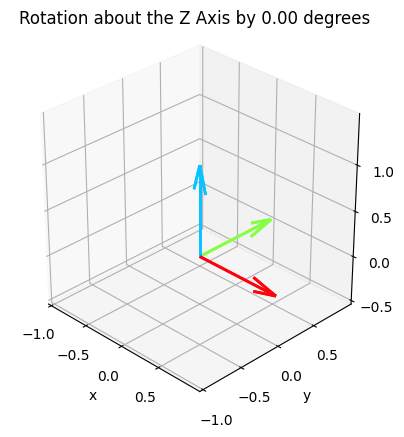

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import math

# ... (your functions here: draw_axis, draw_axis2, initialize_axis_limits, check_axis_limits, increase_axis_limits, set_axis_limits, rotZ) ...

def update_frame(i, ax, location, X, Y, Z, axis_limits, step_angle):
    angle = min(i * step_angle, end_angle)
    ax.clear()
    ax.set_box_aspect([1,1,1])
    plt.gca().set_aspect('equal', adjustable='box')

    orientation = np.dot(np.column_stack((X, Y, Z)), rotZ(angle * math.pi / 180))
    darkness = angle / end_angle / 1.15

    axis_limits = draw_axis(ax, location, np.eye(3), 0, axis_limits)
    axis_limits = draw_axis(ax, location, orientation, darkness, axis_limits)

    ax.set_title(f'Rotation about the Z Axis by {angle:.2f} degrees')

    # Set axes limits
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-.5, 1.5])

    ax.grid(True, linestyle='-', linewidth=0.25)

    # Adjust the viewing angle
    ax.view_init(elev=30, azim=-45)

    # Set the tick marks for each axis
    ax.set_xticks(np.arange(-1, 1, 0.5))
    ax.set_yticks(np.arange(-1, 1, 0.5))
    ax.set_zticks(np.arange(-.5, 1.5, 0.5))

X = np.array([1, 0, 0]).T
Y = np.array([0, 1, 0]).T
Z = np.array([0, 0, 1]).T
location = np.array([0, 0, 0])

axis_limits = initialize_axis_limits()
end_angle = 360
step_angle = 8.0
num_steps = int(np.ceil(end_angle / step_angle))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, update_frame, frames=num_steps + 1, fargs=(ax, location, X, Y, Z, axis_limits, step_angle), interval=100)

FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='3D Axis Rotation', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata)
ani.save('3d_axis_rotation.mp4', writer=writer)

# plt.show() to show the static end figure

from IPython.display import Video
Video("3d_axis_rotation.mp4")


## Transformation Matricies
the 3 by 3 rotation matrix can be adapted to a 4x4 to include position information

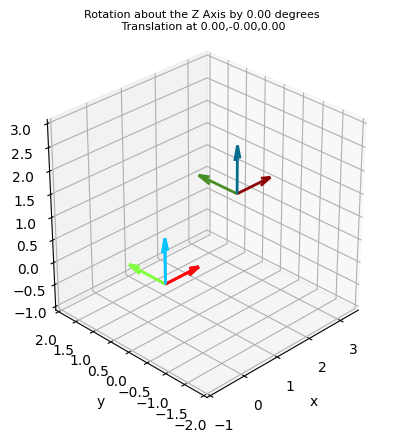

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import math

# ... (your functions here: draw_axis, draw_axis2, initialize_axis_limits, check_axis_limits, increase_axis_limits, set_axis_limits, rotZ) ...

def update_frame(i, ax, location_start, location_end, X, Y, Z, axis_limits, step_angle):
    angle = min(i * step_angle, end_angle)
    ax.clear()
    ax.set_box_aspect([1,1,1])
    plt.gca().set_aspect('equal', adjustable='box')

    orientation = np.dot(np.column_stack((X, Y, Z)), rotZ(angle * math.pi / 180))
    darkness = angle / end_angle / 1.15
    location_progress = angle / end_angle * location_end

    axis_limits = draw_axis(ax, location_start, np.eye(3), 0, axis_limits)
    draw_axis(ax, location_end, np.dot(np.column_stack((X, Y, Z)), rotZ(end_angle * math.pi / 180)), 0.8, axis_limits)
    axis_limits = draw_axis(ax, location_progress, orientation, darkness, axis_limits)

    ax.set_title(f'Rotation about the Z Axis by {angle:.2f} degrees\n Translation at {location_progress[0]:.2f},{location_progress[1]:.2f},{location_progress[2]:.2f}', fontsize=8)
    
    ax.set_xlim([-1, 3.5])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-1, 3])

    ax.grid(True, linestyle='-', linewidth=0.25)

    # Adjust the viewing angle
    ax.view_init(elev=30, azim=225)

X = np.array([1, 0, 0]).T
Y = np.array([0, 1, 0]).T
Z = np.array([0, 0, 1]).T
location_start = np.array([0, 0, 0])
location_end = np.array([1, -1, 2])

axis_limits = initialize_axis_limits()
end_angle = 360
step_angle = 8.0
num_steps = int(np.ceil(end_angle / step_angle))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, update_frame, frames=num_steps + 1, fargs=(ax, location_start, location_end, X, Y, Z, axis_limits, step_angle), interval=100)

FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='3D Axis Rotation and Translation', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata)
ani.save('TransformationMatrixAnimation.mp4', writer=writer)

# plt.show() to show the static end figure

from IPython.display import Video
Video("TransformationMatrixAnimation.mp4")


## Lets Show off a little

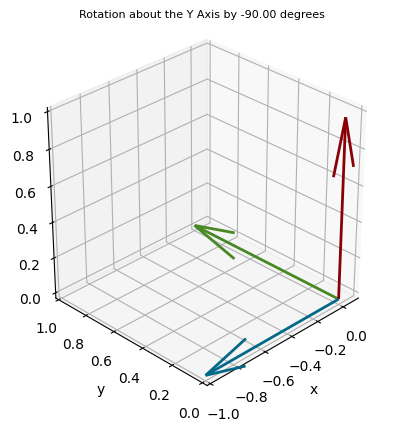

TypeError: unsupported operand type(s) for +=: 'FuncAnimation' and 'FuncAnimation'

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import math

def set_axis_limits(ax, axis_limits):
    ax.set_xlim([axis_limits['xmin'], axis_limits['xmax']])
    ax.set_ylim([axis_limits['ymin'], axis_limits['ymax']])
    ax.set_zlim([axis_limits['zmin'], axis_limits['zmax']])


# ... (your functions here: draw_axis, draw_axis2, initialize_axis_limits, check_axis_limits, increase_axis_limits, set_axis_limits, rotX, rotY, rotZ) ...

location_start = np.array([0, 0, 0]).T
R = np.eye(3)
Tstart = np.vstack([np.column_stack((R, location_start)), [0, 0, 0, 1]])

end_angle = -90
step_angle = 5.0
num_steps = int(np.ceil(abs(end_angle) / step_angle))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rotations = [rotY, rotZ, lambda x: np.dot(rotY(-90 * math.pi / 180), rotZ(-90 * math.pi / 180)), lambda x: np.dot(np.dot(rotY(-90 * math.pi / 180), rotZ(-90 * math.pi / 180)), rotX(-90 * math.pi / 180))]
Tstart_values = [Tstart, np.vstack([np.column_stack((rotY(-90 * math.pi / 180), [0, 0, 0])), [0, 0, 0, 1]])]

ani_list = []
for i, rot_func in enumerate(rotations):
    Tstart = Tstart_values[min(i, 1)]
    ani = animation.FuncAnimation(fig, update_frame, frames=num_steps + 1, fargs=(ax, Tstart, end_angle, step_angle, rot_func), interval=100)
    ani_list.append(ani)
    plt.pause(0.05)

# Save the animations as a gif
animation_list = ani_list[0]
for i in range(1, len(ani_list)):
    animation_list += ani_list[i]

animation_list.save('animation.gif', writer='imagemagick', fps=15)
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


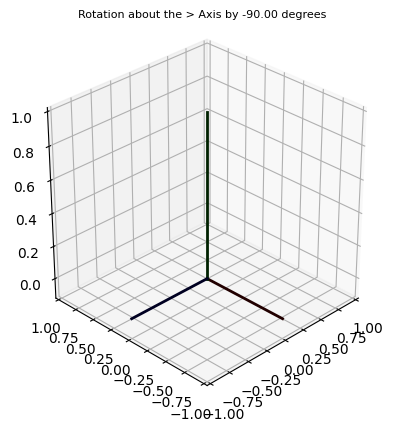

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import math

# ... (your functions here: draw_axis, draw_axis2, initialize_axis_limits, check_axis_limits, increase_axis_limits, set_axis_limits, rotX, rotY, rotZ) ...

def update_frame(i, ax, Tstart_values, end_angle, step_angle, rot_funcs):
    rot_func_index = i // (num_steps + 1)
    frame_index = i % (num_steps + 1)
    angle = min(frame_index * step_angle, end_angle)
    ax.clear()
    ax.set_box_aspect([1, 1, 1])
    plt.gca().set_aspect('equal', adjustable='box')

    rot_func = rot_funcs[rot_func_index]
    Tstart = Tstart_values[min(rot_func_index, 1)]
    Rcurrent = rot_func(angle * math.pi / 180)
    Tlast_to_now = np.vstack([np.column_stack((Rcurrent, [0, 0, 0])), [0, 0, 0, 1]])
    Tnow = np.dot(Tstart, Tlast_to_now)
    
    darkness = angle / end_angle / 1.15
    
    draw_axis2(ax, Tnow, darkness)
    ax.set_title(f'Rotation about the {rot_func.__name__[-1]} Axis by {angle:.2f} degrees', fontsize=8)

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-0.1, 1])

    ax.grid(True, linestyle='-', linewidth=0.25)
    ax.view_init(elev=30, azim=225)


location_start = np.array([0, 0, 0]).T
R = np.eye(3)
Tstart = np.vstack([np.column_stack((R, location_start)), [0, 0, 0, 1]])

end_angle = -90
step_angle = 5.0
num_steps = int(np.ceil(abs(end_angle) / step_angle))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rotations = [rotY, rotZ, lambda x: np.dot(rotY(-90 * math.pi / 180), rotZ(-90 * math.pi / 180)), lambda x: np.dot(np.dot(rotY(-90 * math.pi / 180), rotZ(-90 * math.pi / 180)), rotX(-90 * math.pi / 180))]
Tstart_values = [Tstart, np.vstack([np.column_stack((rotY(-90 * math.pi / 180), [0, 0, 0])), [0, 0, 0, 1]])]

total_frames = len(rotations) * (num_steps + 1)

ani = animation.FuncAnimation(fig, update_frame, frames=total_frames, fargs=(ax, Tstart_values, end_angle, step_angle, rotations), interval=100)

ani.save('animation.gif', writer='imagemagick', fps=15)
plt.show()
